# News article classification : multiple classification problem

### Reuters

1986년 로이터에서 공개한 짧은 뉴스 기사와 토픽의 집합

로이터(Reuter) 뉴스를 46개의 상호 배타적인 토픽으로 분류하는 신경만을 만든다.

각 토픽은 훈련 세트에 최소한 10개의 샘플을 가지고 있다.

텍스트 분류를 위해 널리 사용되는 간단한 데이터셋

### Reuters 데이터셋 로드

In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000) # 데이터에서 가장 자주 등장하는 단어 1만개로 제한

print(len(train_data)) # 8982개의 training data
print(len(test_data)) # 2246개의 test sample

Using TensorFlow backend.


8982
2246


### Reuters 데이터셋을 텍스트로 디코딩하기

In [2]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?')for i in train_data[0]]) 
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺀다.

# 샘플에 연결된 레이블은 토픽의 인덱스로 0과 45사이의 정수이다.
print(train_labels[10])

3


### 데이터 인코딩하기

In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data) # 훈련 데이터 벡터 변환
x_test = vectorize_sequences(test_data) # 테스트 데이터 벡터 변환

In [4]:
# 레이블 벡터 변환
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels) # 훈련 레이블 벡터 변환
one_hot_test_labels = to_one_hot(test_labels) # 테스트 레이블 벡터 변환

In [5]:
# keras 내장 함수
from keras.utils.np_utils  import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### 모델 정의하기

In [6]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


### 모델 컴파일하기

In [7]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### 검증 세트 준비하기

In [8]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

### 모델 훈련하기

In [9]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 269us/step - loss: 2.5292 - acc: 0.4966 - val_loss: 1.7224 - val_acc: 0.6100
Epoch 2/20
7982/7982 [==============================] - 2s 191us/step - loss: 1.4461 - acc: 0.6879 - val_loss: 1.3476 - val_acc: 0.7080
Epoch 3/20
7982/7982 [==============================] - 2s 190us/step - loss: 1.0965 - acc: 0.7648 - val_loss: 1.1726 - val_acc: 0.7420
Epoch 4/20
7982/7982 [==============================] - 1s 187us/step - loss: 0.8709 - acc: 0.8156 - val_loss: 1.0821 - val_acc: 0.7600
Epoch 5/20
7982/7982 [==============================] - 1s 186us/step - loss: 0.7042 - acc: 0.8480 - val_loss: 0.9857 - val_acc: 0.7800
Epoch 6/20
7982/7982 [==============================] - 1s 187us/step - loss: 0.5672 - acc: 0.8792 - val_loss: 0.9429 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 1s 186us/step - loss: 0.4588 - a

### 훈련과 검증 손실 그리기

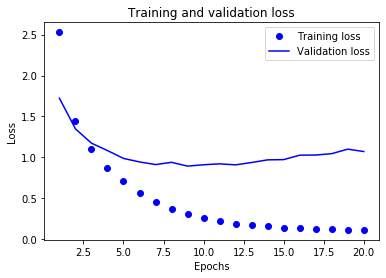

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 훈련과 검증 정확도 그리기

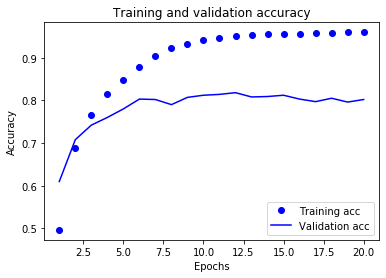

In [19]:
history_dict = history.history
plt.clf()   # 그래프를 초기화합니다
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### 모델을 처음부터 다시 훈련하기

In [12]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 238us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 188us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 2s 189us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 1s 186us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0536 - val_acc: 0.7600
Epoch 5/9
7982/7982 [==============================] - 1s 187us/step - loss: 0.6392 - acc: 0.8624 - val_loss: 0.9754 - val_acc: 0.7930
Epoch 6/9
7982/7982 [==============================] - 1s 186us/step - loss: 0.5123 - acc: 0.8921 - val_loss: 0.9106 - val_acc: 0.8110
Epoch 7/9
7982/7982 [==============================] - 1s 187us/step - loss: 0.4123 - acc: 0.9139 - val_loss: 0.8926 - val_acc: 0.8210
Epoch 8

In [13]:
results

[1.022807171593154, 0.7756010686194165]

### 새로운 데이터에 대해 예측하기

In [14]:
predictions = model.predict(x_test)

In [15]:
predictions[0].shape # predictions의 각 항목은 길이가 46인 벡터이다.

(46,)

In [16]:
np.sum(predictions[0]) # 이 벡터의 원소 합은 1이다.

0.9999999

In [17]:
np.argmax(predictions[0]) # 가장 큰 값이 예측 클래스, 가장 확률이 높은 클래스

3